# Phân tích xu hướng nghe nhạc trên Spotify và Youtube
* Link dataset: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube


Dataset gồm các bài hát của nhiều nghệ sĩ khác nhau trên thế giới và cho từng bài hát:
* Một số số liệu thống kê về phiên bản nhạc (bao gồm số lượt phát trực tuyến) trên Spotify.
* Số lượt xem MV chính thức của bài hát trên Youtube.

## Import các thư viện cần thiết

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Đọc Dataset

In [33]:
df = pd.read_csv('./data/Spotify_Youtube.csv')

> Kích thước của dataset

In [34]:
df.shape

(20718, 28)

* Dataset gồm 20718 dòng x 28 cột

> Xem 20 dòng đầu của DataFrame

In [35]:
display(df.head(20))

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,6.935552e+08,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,7.201164e+07,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8.435055e+06,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,2.117550e+08,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,6.184810e+08,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,2.590212e+08,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,3.238503e+08
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,4.519960e+05,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,1.066615e+07
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,1.010982e+06,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,1.596059e+08
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,2.445982e+07,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,4.267190e+07
9,9,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Dirty Harry,Demon Days,album,spotify:track:2bfGNzdiRa1jXZRdfssSzR,0.625,0.877,10.0,...,https://www.youtube.com/watch?v=cLnkQAeMbIM,Gorillaz - Dirty Harry (Official Video),Gorillaz,1.547611e+08,1386920.0,39240.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,1.910747e+08


## Tiền xử lý dữ liệu

> Hiển thị thông tin tóm tắt của dữ liệu

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

> Tóm tắt thống kê cho các cột dữ liệu trong DataFrame

In [37]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


> Liệt kê các columns trong DataFrame

In [38]:
list[df.columns]

list[Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')]

> Drop các columns không cần thiết

In [39]:
df.drop(columns= ['Unnamed: 0','Url_spotify' ,'Uri' , 'Key', 'Loudness','Url_youtube' ,'Title' ,'Description'], inplace= True)

> DataFrame sau khi loại bỏ các cột không cần thiết 

In [40]:
df.shape

(20718, 20)

* DataFrame còn lại 20 cột

In [41]:
display(df.head(10))

,Artist,Track,Album,Album_type,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08
5,Gorillaz,DARE,Demon Days,album,0.760,0.891,0.0372,0.022900,0.086900,0.2980,0.966,120.264,245000.0,Gorillaz,259021161.0,1844658.0,72008.0,True,True,3.238503e+08
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,0.716,0.897,0.0629,0.012000,0.262000,0.3250,0.358,127.030,274142.0,Dom Dolla,451996.0,11686.0,241.0,False,True,1.066615e+07
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,0.726,0.815,0.0313,0.007990,0.081000,0.1120,0.462,140.158,209560.0,SalvaMuñox,1010982.0,17675.0,260.0,False,False,1.596059e+08
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,0.0465,0.003430,0.103000,0.3250,0.643,120.012,213750.0,Gorillaz,24459820.0,739527.0,20296.0,True,True,4.267190e+07
9,Gorillaz,Dirty Harry,Demon Days,album,0.625,0.877,0.1620,0.031500,0.081100,0.6720,0.865,192.296,230426.0,Gorillaz,154761056.0,1386920.0,39240.0,True,True,1.910747e+08


> Hiển thị thông tin tóm tắt của DataFrame sau khi loại bỏ các cột không cần thiết

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Speechiness       20716 non-null  float64
 7   Acousticness      20716 non-null  float64
 8   Instrumentalness  20716 non-null  float64
 9   Liveness          20716 non-null  float64
 10  Valence           20716 non-null  float64
 11  Tempo             20716 non-null  float64
 12  Duration_ms       20716 non-null  float64
 13  Channel           20248 non-null  object 
 14  Views             20248 non-null  float64
 15  Likes             20177 non-null  float64
 16  Comments          20149 non-null  float6

* 7 cột với kiểu dữ liệu là object (rất có thể là String)
* 11 cột với kiểu dữ liệu là float64 (rất có thể là Numerical)

> Kiểm tra duplicated trong DataFrame

In [43]:
print(df.duplicated().sum())

0


* Không tồn tại duplicated trong DataFrame

> Hiển thị số giá trị Null trong mỗi cột

In [44]:
missing_values = df.isna().sum()
print(missing_values)

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64


> Hiển thị số giá trị Null trong mỗi cột bằng Biểu đồ

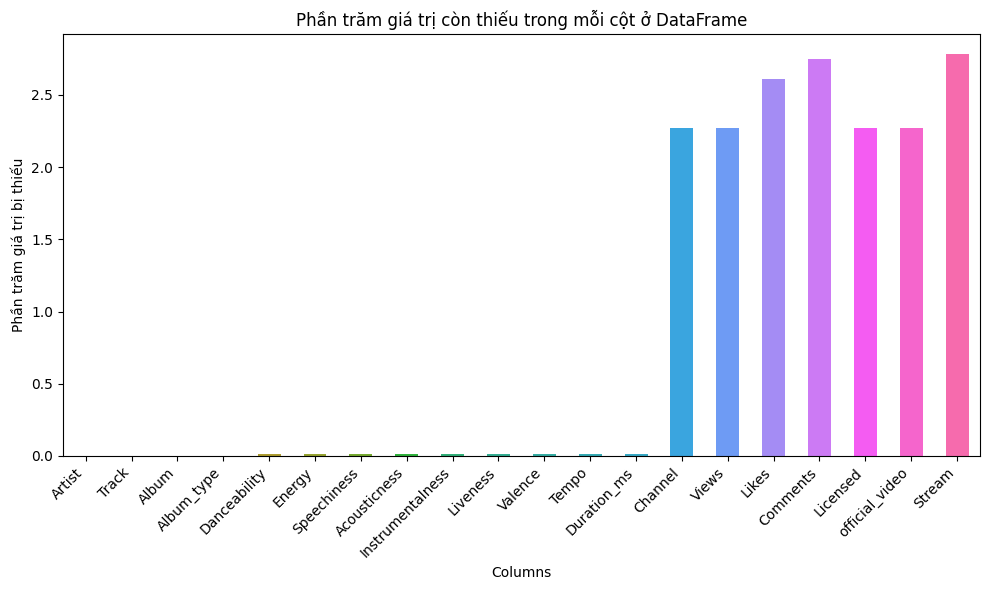

In [45]:
# Xác định màu
colors = sns.color_palette('husl', len(missing_values))

# Tính toán
missing_values_momentum = (df.isnull().sum() / len(df)) * 100

# Tạo biểu đồ Bar chart
plt.figure(figsize=(10,6))
missing_values_momentum.plot(kind='bar', color=colors)
plt.title('Phần trăm giá trị còn thiếu trong mỗi cột ở DataFrame')
plt.xlabel('Columns')
plt.ylabel('Phần trăm giá trị bị thiếu')
plt.xticks(rotation = 45, ha= 'right')
plt.tight_layout()
plt.show()

> Xử lý Null
* Đối với các columns Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms có ít giá trị Null (chỉ có 2 giá trị Null) nên sử dụng phương pháp điền giá trị trung bình.

In [46]:
columns_with_few_missing = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']

for column in columns_with_few_missing:
    df[column].fillna(df[column].mean(), inplace=True)

C:\Users\hghaa\AppData\Local\Temp\ipykernel_21264\3750951986.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


* Đối với các columns Channel, Views, Likes, Comments, Licensed, offical_Video, Stream có nhiều giá trị Null (trên 100 giá trị Null) nên sử dụng phương pháp drop các dòng có giá trị Null tồn tại ở các cột này.

> DataFrame sau khi xử lý Nulls

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20718 non-null  float64
 5   Energy            20718 non-null  float64
 6   Speechiness       20718 non-null  float64
 7   Acousticness      20718 non-null  float64
 8   Instrumentalness  20718 non-null  float64
 9   Liveness          20718 non-null  float64
 10  Valence           20718 non-null  float64
 11  Tempo             20718 non-null  float64
 12  Duration_ms       20718 non-null  float64
 13  Channel           20248 non-null  object 
 14  Views             20248 non-null  float64
 15  Likes             20177 non-null  float64
 16  Comments          20149 non-null  float6

> Hiển thị số giá trị Nulls trong mỗi columns

In [48]:
print(df.isna().sum())

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          0
Energy                0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64


> Thiết lập dấu phẩy cho kiểu dữ liệu float

In [49]:
pd.options.display.float_format = '{:,.2f}'.format

> DataFrame sau khi điều chỉnh hiển thị dữ liệu

In [50]:
df.head(5)

,Artist,Track,Album,Album_type,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.82,0.70,0.18,0.01,0.00,0.61,0.77,138.56,"222,640.00",Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",True,True,"1,040,234,854.00"
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.68,0.70,0.03,0.09,0.00,0.05,0.85,92.76,"200,173.00",Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",True,True,"310,083,733.00"
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.69,0.92,0.05,0.04,0.05,0.12,0.55,108.01,"215,150.00",Gorillaz,"8,435,055.00","282,142.00","7,399.00",True,True,"63,063,467.00"
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.69,0.74,0.03,0.00,0.51,0.06,0.58,120.42,"233,867.00",Gorillaz,"211,754,952.00","1,788,577.00","55,229.00",True,True,"434,663,559.00"
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.66,0.69,0.17,0.03,0.00,0.07,0.53,167.95,"340,920.00",Gorillaz,"618,480,958.00","6,197,318.00","155,930.00",True,True,"617,259,738.00"


> Chọn các cột số cho thống kê mô tả

In [51]:
numerical_columns = df.select_dtypes(include=['float64'])
numerical_des = numerical_columns.describe()
print(numerical_des)

       Danceability    Energy  Speechiness  Acousticness  Instrumentalness  \
count     20,718.00 20,718.00    20,718.00     20,718.00         20,718.00   
mean           0.62      0.64         0.10          0.29              0.06   
std            0.17      0.21         0.11          0.29              0.19   
min            0.00      0.00         0.00          0.00              0.00   
25%            0.52      0.51         0.04          0.05              0.00   
50%            0.64      0.67         0.05          0.19              0.00   
75%            0.74      0.80         0.10          0.48              0.00   
max            0.97      1.00         0.96          1.00              1.00   

       Liveness   Valence     Tempo  Duration_ms            Views  \
count 20,718.00 20,718.00 20,718.00    20,718.00        20,248.00   
mean       0.19      0.53    120.64   224,717.58    93,937,821.13   
std        0.17      0.25     29.58   124,784.52   274,644,322.00   
min        0.01      

> Chọn các columns để vẽ boxplot xem có tồn tại giá trị outliers không

In [52]:
boxplot_columns = numerical_columns.drop(['Views','Likes', 'Comments', 'Stream'], axis=1)

* Drop 4 columns trên vì giá trị quá lớn không thể vẽ boxplot? /kiểm tra lại giúp/

> Vẽ boxplot cho các columns numerical còn lại

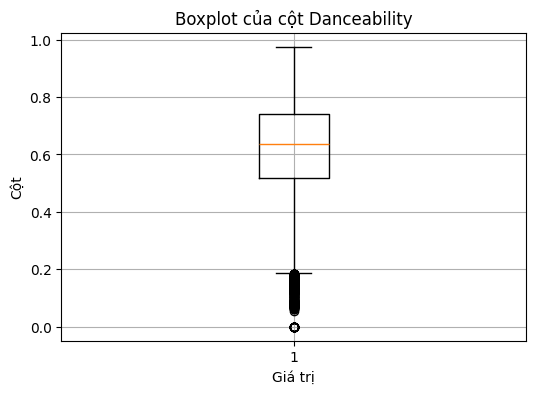

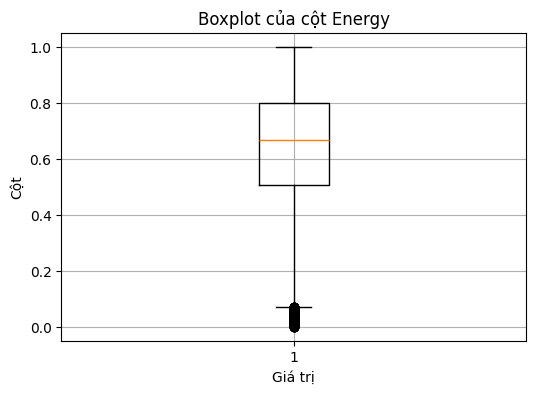

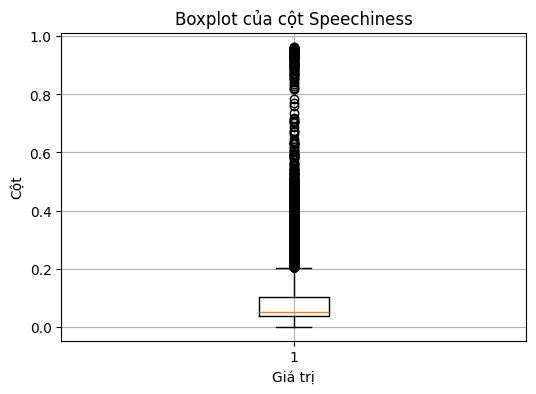

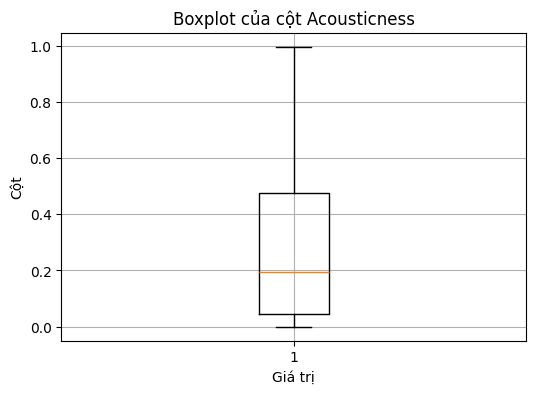

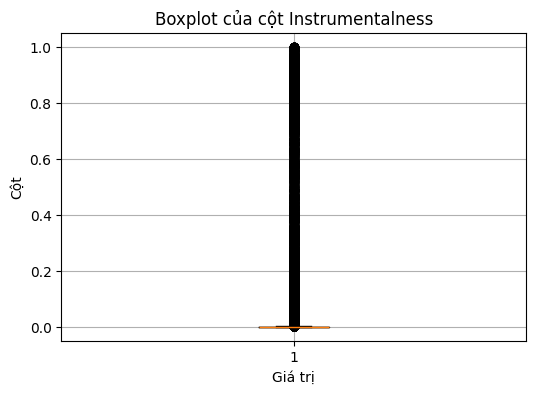

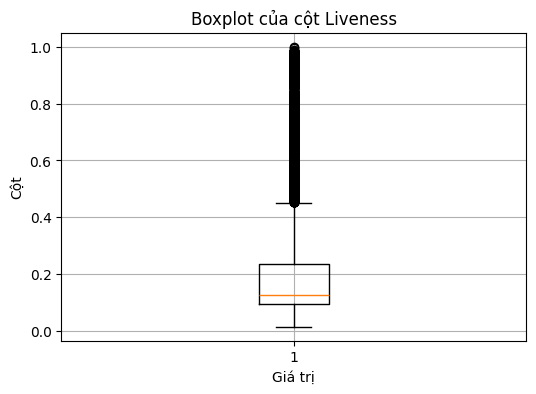

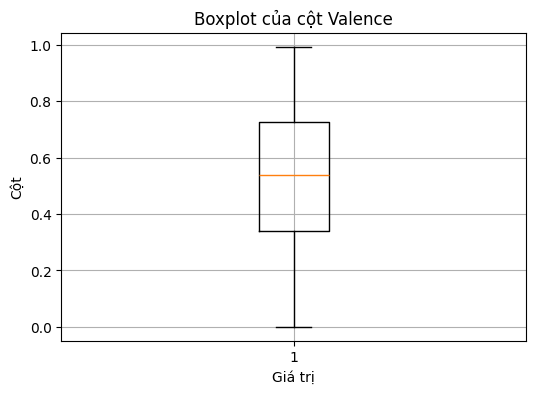

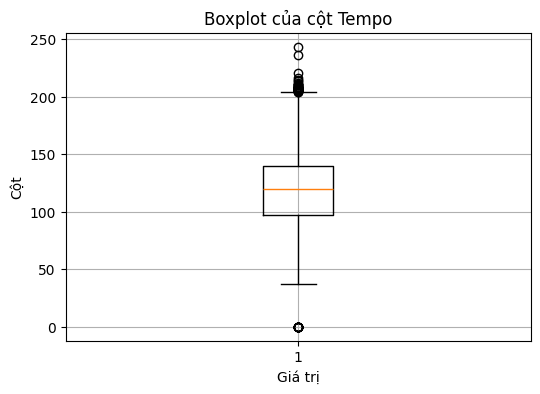

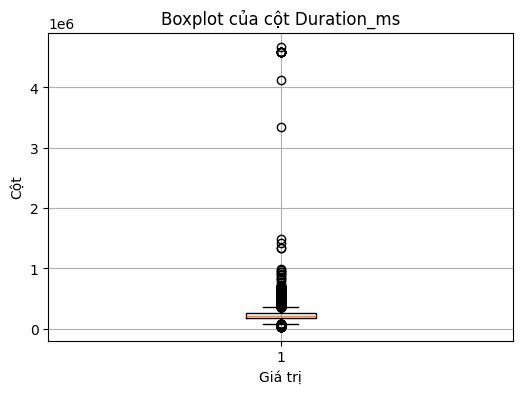

In [53]:
for column in boxplot_columns:
    # Tạo một hình vẽ mới cho mỗi cột
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column])
    plt.title(f'Boxplot của cột {column}')
    plt.xlabel('Giá trị')
    plt.ylabel('Cột')
    plt.grid(True)
    # Hiển thị hình vẽ
    plt.show()

* Ta có thể thấy các columns trên không tồn tại giá trị outliers /Kiểm tra lại/

## Phân tích thăm dò dữ liệu

#### 1. Phân tích Album type

In [54]:
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

Album_type
album          14926
single          5004
compilation      788
Name: count, dtype: int64


> Pie chart

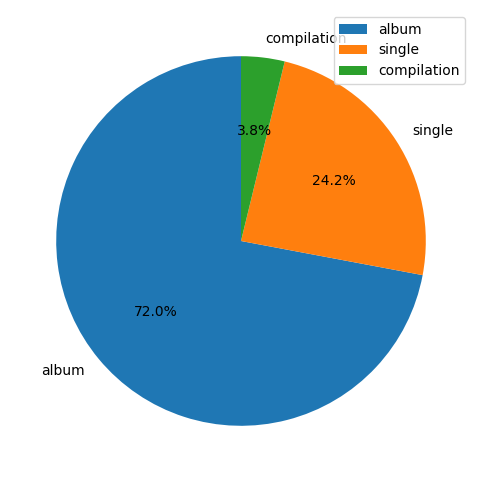

In [55]:
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()

plt.figure(figsize=(15,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.legend(labels, loc='best')

plt.show()

* Nhận xét:

#### 2. Phân tích bài hát theo nghệ sĩ và lượt phát - Spotify, lượt xem - youtube

In [56]:
# Group the songs by artist and stream - spotify, views - youtube
artist_group = df.groupby('Artist')[['Stream','Views']].sum()

# Sort the artists by the sum of streams and views in descending order
artist_sort = artist_group.sort_values(['Stream', 'Views'], ascending=False)

# Get the top 10 Artist with the most number of streams on Spotify and views on Youtube
top_10_artist = artist_sort.head(10)

top_10_artist

,Stream,Views
Artist,,
Post Malone,"15,251,263,853.00","6,394,420,209.00"
Ed Sheeran,"14,394,881,557.00","15,460,207,769.00"
Dua Lipa,"13,408,076,274.00","8,216,339,307.00"
XXXTENTACION,"13,224,351,699.00","2,546,374,320.00"
The Weeknd,"13,031,973,376.00","7,046,033,154.00"
Justin Bieber,"12,097,767,422.00","10,991,060,236.00"
Imagine Dragons,"11,858,310,928.00","9,093,785,238.00"
Coldplay,"11,778,478,236.00","9,997,277,884.00"
Khalid,"11,386,839,915.00","5,398,246,275.00"


> Tạo DataFrame cho Stream và Views

In [57]:
# Create dataframes for streams and views
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]

display(df_streams)
display(df_views)

Artist
Post Malone       15,251,263,853.00
Ed Sheeran        14,394,881,557.00
Dua Lipa          13,408,076,274.00
XXXTENTACION      13,224,351,699.00
The Weeknd        13,031,973,376.00
Justin Bieber     12,097,767,422.00
Imagine Dragons   11,858,310,928.00
Coldplay          11,778,478,236.00
Khalid            11,386,839,915.00
Bruno Mars        10,897,862,950.00
Name: Stream, dtype: float64

Artist
Ed Sheeran                15,460,207,769.00
CoComelon                 14,601,671,211.00
Katy Perry                13,120,632,075.00
Charlie Puth              12,167,594,191.00
Luis Fonsi                11,628,113,031.00
Justin Bieber             10,991,060,236.00
Daddy Yankee              10,871,926,842.00
Bruno Mars                10,240,919,227.00
Macklemore & Ryan Lewis   10,122,055,560.00
Coldplay                   9,997,277,884.00
Name: Views, dtype: float64

> Bar chart

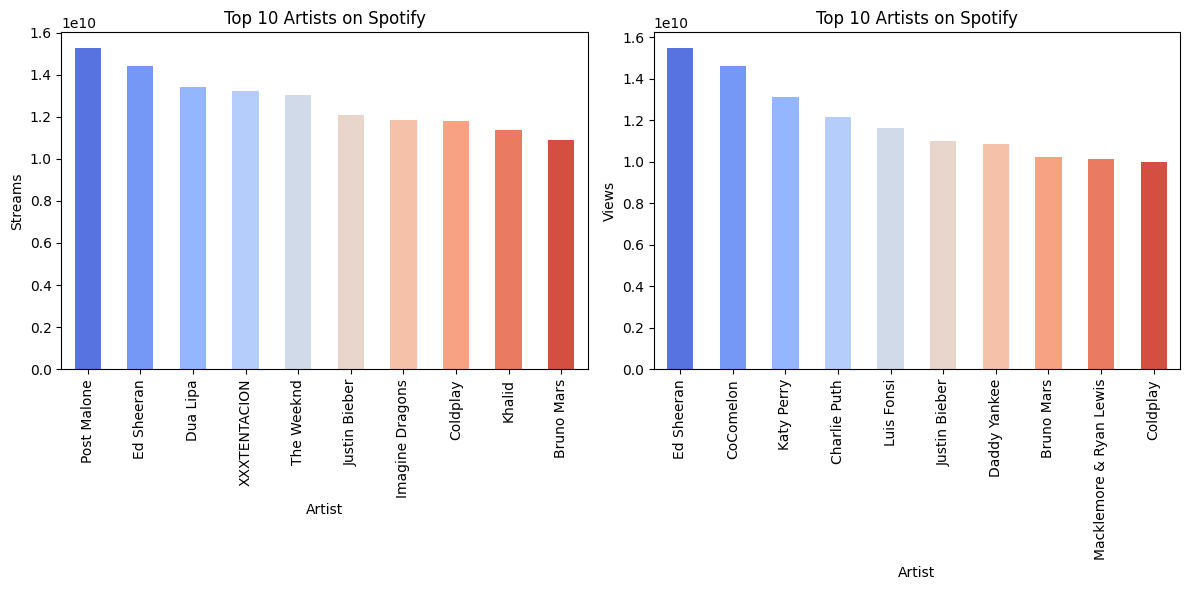

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create color the columns
colors_streams = sns.color_palette('coolwarm', len(df_streams))
colors_views = sns.color_palette('coolwarm', len(df_views))

# Top 10 streams on Spotify
ax1.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax1, color=colors_streams)
ax1.set_xlabel('Artist')
ax1.set_ylabel('Streams')

# Top 10 views on Youtube
ax2.set_title('Top 10 Artists on Spotify')
df_views.plot(kind='bar', ax=ax2, color=colors_views)
ax2.set_xlabel('Artist')
ax2.set_ylabel('Views')

fig.tight_layout()
plt.show()

* Nhận xét

#### 3. Phân tích op 10 bài hát dựa trên Views, Comments và Likes

In [59]:
# Drop column 'Artist'
df_tracks = df.drop('Artist', axis=1)

# Remove duplicate rows base on column 'Track'
df_tracks = df_tracks.drop_duplicates(subset=['Track'])

df_tracks.head(5)

,Track,Album,Album_type,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Feel Good Inc.,Demon Days,album,0.82,0.70,0.18,0.01,0.00,0.61,0.77,138.56,"222,640.00",Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",True,True,"1,040,234,854.00"
1,Rhinestone Eyes,Plastic Beach,album,0.68,0.70,0.03,0.09,0.00,0.05,0.85,92.76,"200,173.00",Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",True,True,"310,083,733.00"
2,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.69,0.92,0.05,0.04,0.05,0.12,0.55,108.01,"215,150.00",Gorillaz,"8,435,055.00","282,142.00","7,399.00",True,True,"63,063,467.00"
3,On Melancholy Hill,Plastic Beach,album,0.69,0.74,0.03,0.00,0.51,0.06,0.58,120.42,"233,867.00",Gorillaz,"211,754,952.00","1,788,577.00","55,229.00",True,True,"434,663,559.00"
4,Clint Eastwood,Gorillaz,album,0.66,0.69,0.17,0.03,0.00,0.07,0.53,167.95,"340,920.00",Gorillaz,"618,480,958.00","6,197,318.00","155,930.00",True,True,"617,259,738.00"


In [60]:
# Top 10 songs based on views
top_10_song_by_views = df_tracks.nlargest(10, 'Views')

# Top 10 songs based on comments
top_10_song_by_comments = df_tracks.nlargest(10, 'Comments')

# Top 10 songs based on likes
top_10_song_by_likes = df_tracks.nlargest(10, 'Likes')

# display(top_10_song_by_views)
# display(top_10_song_by_comments)
# display(top_10_song_by_likes)

> Horizontal bar chart

<Figure size 1200x600 with 0 Axes>

C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) 

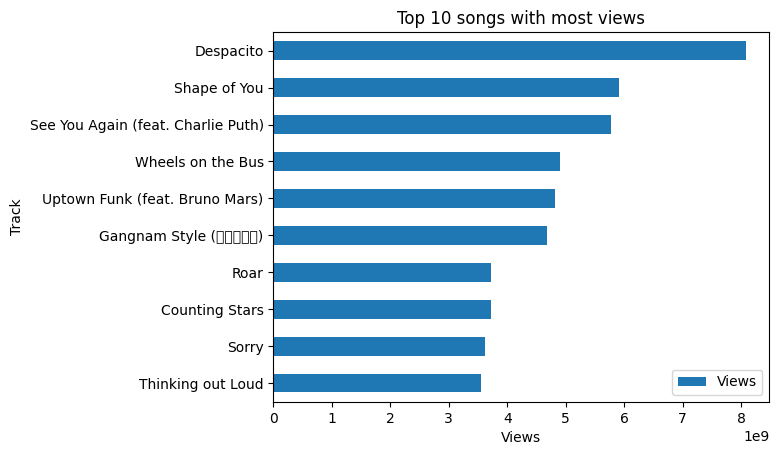

In [61]:
plt.figure(figsize=(12, 6))
top_10_song_by_views.sort_values(by='Views', ascending=True).plot(kind='barh', x='Track', y='Views', title='Top 10 songs with most views')
plt.xlabel('Views')
plt.ylabel('Track')
plt.show()

<Figure size 1200x600 with 0 Axes>

C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) 

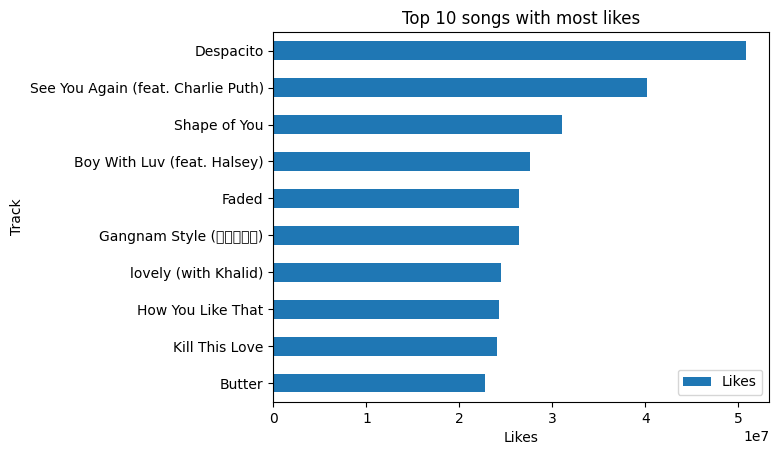

In [62]:
plt.figure(figsize=(12, 6))
top_10_song_by_likes.sort_values(by='Likes', ascending=True).plot(kind='barh', x='Track', y='Likes', title='Top 10 songs with most likes')
plt.xlabel('Likes')
plt.ylabel('Track')
plt.show()

<Figure size 1200x600 with 0 Axes>

C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hghaa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) 

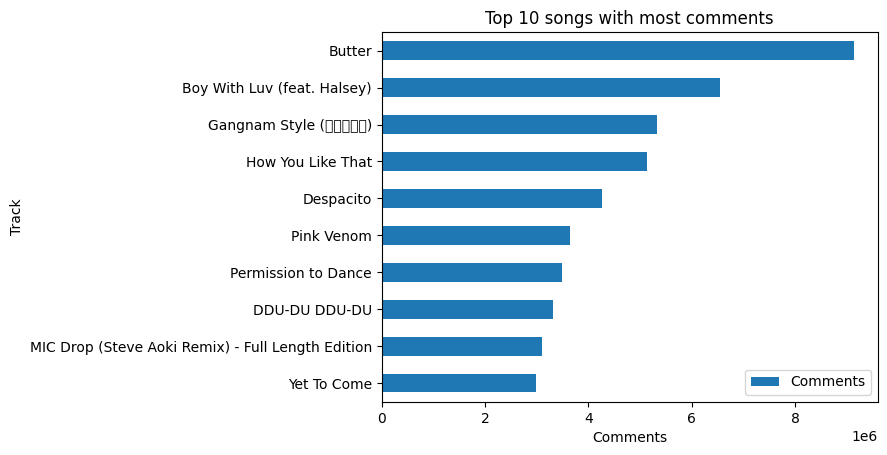

In [63]:
plt.figure(figsize=(12, 6))
top_10_song_by_comments.sort_values(by='Comments', ascending=True).plot(kind='barh', x='Track', y='Comments', title='Top 10 songs with most comments')
plt.xlabel('Comments')
plt.ylabel('Track')
plt.show()

* Nhận xét

#### 4. Phân tích bài hát dựa trên Energy và Danceability

In [64]:
top_songs = df.sort_values('Stream', ascending=False).head(10)

top_songs[['Track', 'Energy', 'Danceability', 'Acousticness']]


,Track,Energy,Danceability,Acousticness
15250,Blinding Lights,0.73,0.51,0.00
12452,Shape of You,0.65,0.82,0.58
19186,Someone You Loved,0.41,0.50,0.75
17937,rockstar (feat. 21 Savage),0.52,0.58,0.12
17445,Sunflower - Spider-Man: Into the Spider-Verse,0.52,0.76,0.53
17938,Sunflower - Spider-Man: Into the Spider-Verse,0.52,0.76,0.53
13503,One Dance,0.62,0.79,0.01
16099,Closer,0.52,0.75,0.41
16028,Closer,0.52,0.75,0.41
14030,Believer,0.78,0.78,0.06


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


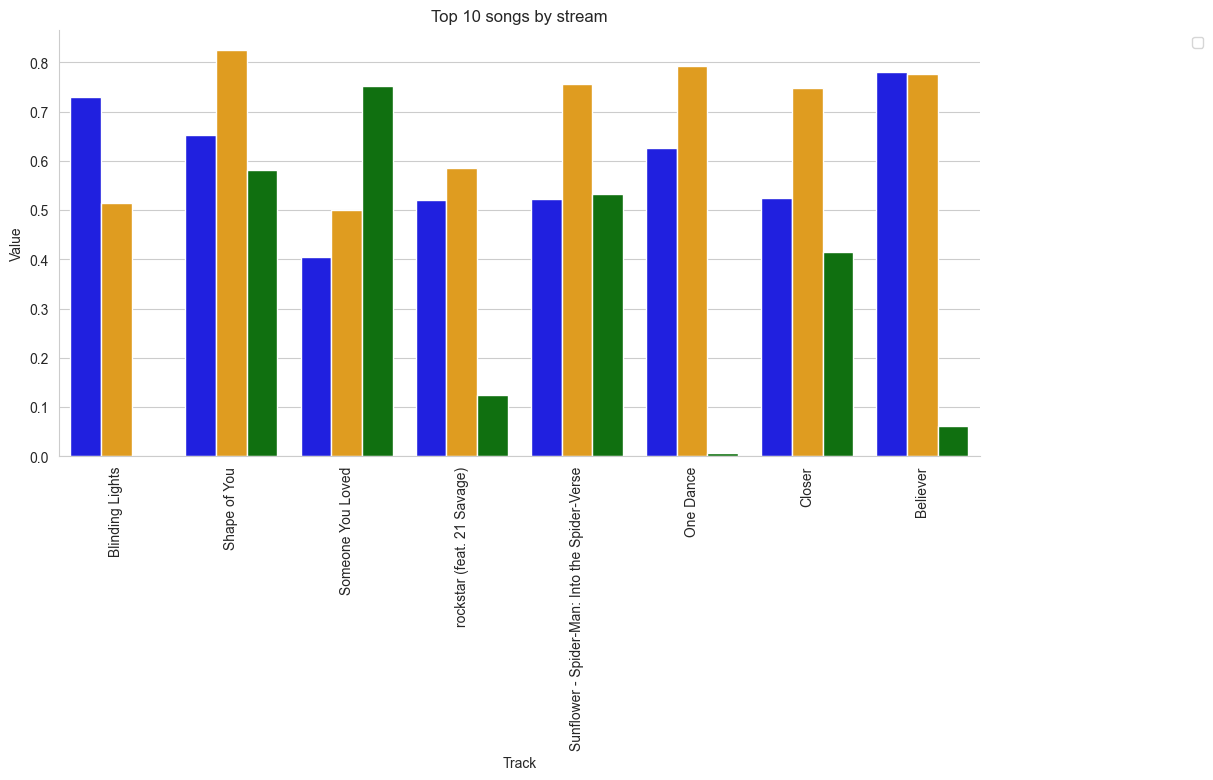

In [65]:
top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'], var_name='Attribute', value_name='Value')
sns.set_style('whitegrid')
sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',
            palette={'Energy': 'blue', 'Danceability': 'orange', 'Acousticness': 'green'},
            aspect=2, legend=False)

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Top 10 songs by stream')
plt.xlabel('Track')
plt.ylabel('Value')
plt.xticks(rotation = 90)

plt.show()

* Nhận xét

> Xác định top 10 nghệ sĩ trên nền tảng Spotify có bài hát được nhiều lượt thích

In [66]:
# Making the column 'Artist' as the index
df_artist = df.set_index('Artist')
df_artist = df_artist[['Danceability', 'Views', 'Likes', 'Album_type']]

df_artist.head(5)

,Danceability,Views,Likes,Album_type
Artist,,,,
Gorillaz,0.82,"693,555,221.00","6,220,896.00",album
Gorillaz,0.68,"72,011,645.00","1,079,128.00",album
Gorillaz,0.69,"8,435,055.00","282,142.00",single
Gorillaz,0.69,"211,754,952.00","1,788,577.00",album
Gorillaz,0.66,"618,480,958.00","6,197,318.00",album


In [67]:
# Group the data by artist, calculate the mean likes
df_artist_like_group = df_artist.groupby('Artist')['Likes'].sum().reset_index()

# Sort by danceability score in descending order
df_artist_like_group_sort = df_artist_like_group.sort_values(by='Likes', ascending=False)

# Top 10 with the most danceability score
top_10_artist_by_like = df_artist_like_group_sort.head(10)

top_10_artist_by_like

,Artist,Likes
153,BTS,"139,403,808.00"
151,BLACKPINK,"132,302,505.00"
333,Charlie Puth,"86,336,925.00"
526,Ed Sheeran,"83,543,319.00"
927,Justin Bieber,"78,584,348.00"
202,Billie Eilish,"73,338,537.00"
777,Imagine Dragons,"72,274,477.00"
59,Alan Walker,"67,977,702.00"
418,DJ Snake,"67,775,831.00"
1149,Luis Fonsi,"66,908,489.00"


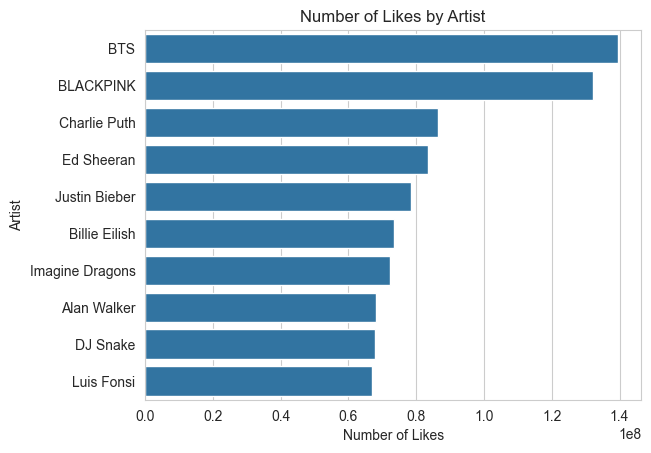

In [68]:
# Data Visualization 
sns.barplot(x='Likes', y ='Artist', data=top_10_artist_by_like)
plt.xlabel('Number of Likes')
plt.ylabel('Artist')
plt.title('Number of Likes by Artist')

plt.show()

* Nhận xét

> Xác định top Channels trên Youtube dựa trên Views

In [69]:
df_channels = df.groupby('Channel')['Views'].sum().reset_index()

df_channels_sort = df_channels.sort_values('Views', ascending=False).head(10)

df_channels_sort

,Channel,Views
4908,T-Series,"47,961,585,483.00"
3099,LuisFonsiVEVO,"21,702,521,043.00"
829,CalvinHarrisVEVO,"18,281,142,527.00"
3223,Macklemore,"17,003,410,965.00"
1491,Ed Sheeran,"16,918,224,412.00"
2092,Hear This Music,"15,088,505,405.00"
1021,Cocomelon - Nursery Rhymes,"14,601,671,211.00"
744,Bruno Mars,"13,013,566,838.00"
2665,KatyPerryVEVO,"12,476,802,428.00"
1168,DJSnakeVEVO,"12,455,097,762.00"


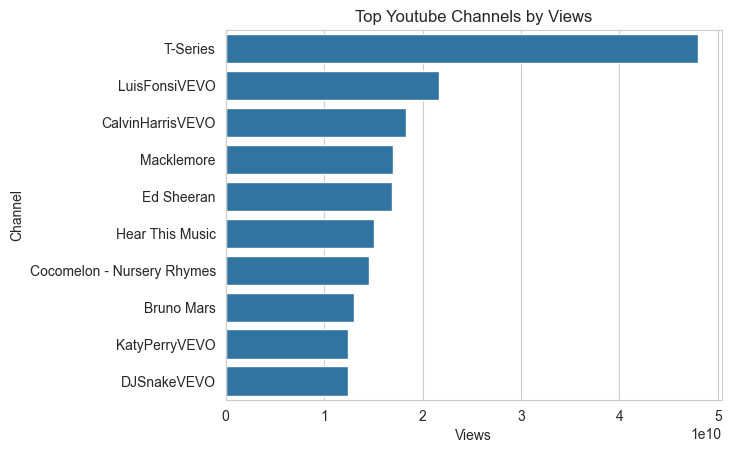

In [70]:
sns.barplot(x='Views', y='Channel', data=df_channels_sort)
plt.xlabel('Views')
plt.ylabel('Channel')
plt.title('Top Youtube Channels by Views')

plt.show()

* Nhận xét